In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import IPython as ipd
import ipywidgets as widgets
import IPython.display as display

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [51]:
pwd

'C:\\Users\\Keshav\\Desktop\\Churn Prediction'

In [52]:
!dir

 Volume in drive C is Acer
 Volume Serial Number is 0849-C876

 Directory of C:\Users\Keshav\Desktop\Churn Prediction

16-11-2021  01:32    <DIR>          .
15-11-2021  20:36    <DIR>          ..
13-11-2021  09:41    <DIR>          .ipynb_checkpoints
16-11-2021  00:41             1,699 app.py
15-11-2021  21:01               410 churn.py
16-11-2021  01:32           122,767 Churn_prediction.ipynb
15-11-2021  22:14            40,144 final_model.h5
15-11-2021  21:56             1,692 main_app.py
15-11-2021  21:08    <DIR>          static
15-11-2021  21:04    <DIR>          templates
12-11-2021  19:34           977,501 WA_Fn-UseC_-Telco-Customer-Churn.csv
16-11-2021  00:42    <DIR>          __pycache__
               6 File(s)      1,144,213 bytes
               6 Dir(s)  419,489,718,272 bytes free


In [53]:
data = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

# Preprocessing

In [54]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [55]:
data.drop('customerID',axis='columns',inplace=True)
#customerID column is not significant

In [56]:
data.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [57]:
data.TotalCharges.values
#TotalCharges column is an object, must be converted into float

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [58]:
pd.to_numeric(data.TotalCharges)

ValueError: Unable to parse string " " at position 488

In [59]:
data['TotalCharges'][488]

' '

In [60]:
pd.to_numeric(data.TotalCharges, errors='coerce').isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [61]:
data[pd.to_numeric(data.TotalCharges, errors='coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [62]:
data = data[data.TotalCharges != " "]

In [63]:
data.shape

(7032, 20)

In [64]:
pd.to_numeric(data.TotalCharges)

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7032, dtype: float64

In [65]:
data.TotalCharges = pd.to_numeric(data.TotalCharges)

In [66]:
data.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [67]:
sns

<module 'seaborn' from 'C:\\Users\\Keshav\\anaconda3\\lib\\site-packages\\seaborn\\__init__.py'>

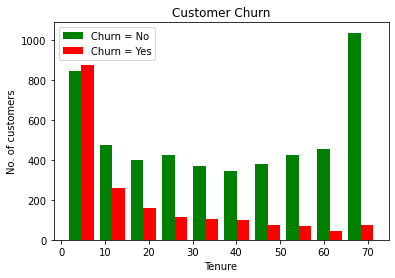

In [68]:
#plotting tenure vs No. of customers for visualisation

tenure_churn_no = data[data.Churn == "No"].tenure
tenure_churn_yes = data[data.Churn == "Yes"].tenure

plt.xlabel("Tenure")
plt.ylabel("No. of customers")
plt.title("Customer Churn")

plt.hist([tenure_churn_no, tenure_churn_yes], color=['green', 'red'])
plt.legend(labels=["Churn = No", "Churn = Yes"])

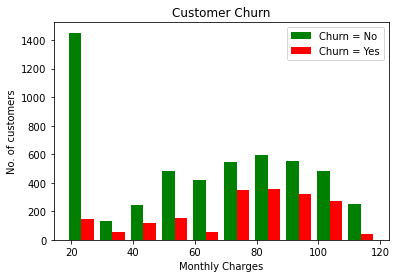

In [69]:
#plotting Monthly charges vs No. of customers for visualisation

tenure_churn_no = data[data.Churn == "No"].MonthlyCharges
tenure_churn_yes = data[data.Churn == "Yes"].MonthlyCharges

plt.xlabel("Monthly Charges")
plt.ylabel("No. of customers")
plt.title("Customer Churn")

plt.hist([tenure_churn_no, tenure_churn_yes], color=['green', 'red'])
plt.legend(labels=["Churn = No", "Churn = Yes"])

In [70]:
for col in data:
    if(data[col].dtypes == 'object'):
        print( f'{col} : {data[col].unique()}' )

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [71]:
data.replace("No internet service", "No", inplace=True)
data.replace("No phone service", "No", inplace=True)
#as these values can be considered as "No" itself

In [72]:
for col in data:
    if(data[col].dtypes == 'object'):
        print( f'{col} : {data[col].unique()}' )

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes']
OnlineBackup : ['Yes' 'No']
DeviceProtection : ['No' 'Yes']
TechSupport : ['No' 'Yes']
StreamingTV : ['No' 'Yes']
StreamingMovies : ['No' 'Yes']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [73]:
#converting Yes to 1 and No to 0

yes_no_columns = ['Partner', 'Dependents', 'PhoneService', 'MultipleLines', 
                'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 
                 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Churn']

for col in yes_no_columns:
    data[col].replace({ "Yes" : 1, "No" : 0}, inplace=True)

In [74]:
#converting Female to 1 and Male to 0

data['gender'].replace({'Female':1, 'Male':0},inplace=True)

In [75]:
for col in data:
    print( f'{col} : {data[col].unique()}' )

gender : [1 0]
SeniorCitizen : [0 1]
Partner : [1 0]
Dependents : [0 1]
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService : [0 1]
MultipleLines : [0 1]
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : [0 1]
OnlineBackup : [1 0]
DeviceProtection : [0 1]
TechSupport : [0 1]
StreamingTV : [0 1]
StreamingMovies : [0 1]
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : [1 0]
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges : [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn : [0 1]


In [76]:
#One hot encoding

ohe_cols = ['InternetService', 'Contract', 'PaymentMethod']
data = pd.get_dummies(data=data, columns=ohe_cols)

In [77]:
data.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [78]:
 data.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             

In [79]:
#Scaling

cols_to_scale = ['tenure', 'MonthlyCharges', 'TotalCharges']
scaler = MinMaxScaler()
data[cols_to_scale] = scaler.fit_transform(data[cols_to_scale])

In [80]:
for col in data:
    print( f'{col} : {data[col].unique()}' )

gender : [1 0]
SeniorCitizen : [0 1]
Partner : [1 0]
Dependents : [0 1]
tenure : [0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService : [0 1]
MultipleLines : [0 1]
OnlineSecurity : [0 1]
OnlineBackup : [1 0]
DeviceProtection : [0 1]
Tech

# Model building

In [81]:
X = data.drop('Churn', axis="columns")
y = data['Churn']

In [82]:
X.shape

(7032, 26)

In [83]:
y.shape

(7032,)

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [85]:
X_train.shape

(5625, 26)

In [86]:
X_test.shape

(1407, 26)

In [87]:
model = keras.Sequential([
    keras.layers.Dense(20, input_shape=(26,), activation='relu'),
    keras.layers.Dense(8, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])


model.compile(optimizer = 'adam',
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])

model.fit(X_train, y_train, epochs = 100)

Epoch 1/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4928 - accuracy: 0.7632
Epoch 2/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4295 - accuracy: 0.7916
Epoch 3/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4209 - accuracy: 0.7989
Epoch 4/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4159 - accuracy: 0.8032
Epoch 5/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4132 - accuracy: 0.8055
Epoch 6/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4107 - accuracy: 0.8053
Epoch 7/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4099 - accuracy: 0.8069
Epoch 8/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4078 - accuracy: 0.8078
Epoch 9/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4065 - accuracy: 0.8094
Epoch 10/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4050 - accura

176/176 [==============================] - 0s 1ms/step - loss: 0.3767 - accuracy: 0.8252
Epoch 82/100
176/176 [==============================] - 0s 1ms/step - loss: 0.3757 - accuracy: 0.8295
Epoch 83/100
176/176 [==============================] - 0s 1ms/step - loss: 0.3765 - accuracy: 0.8251
Epoch 84/100
176/176 [==============================] - 0s 1ms/step - loss: 0.3765 - accuracy: 0.8286
Epoch 85/100
176/176 [==============================] - 0s 1ms/step - loss: 0.3752 - accuracy: 0.8286
Epoch 86/100
176/176 [==============================] - 0s 1ms/step - loss: 0.3748 - accuracy: 0.8295
Epoch 87/100
176/176 [==============================] - 0s 1ms/step - loss: 0.3748 - accuracy: 0.8306
Epoch 88/100
176/176 [==============================] - 0s 1ms/step - loss: 0.3740 - accuracy: 0.8276
Epoch 89/100
176/176 [==============================] - 0s 1ms/step - loss: 0.3739 - accuracy: 0.8283
Epoch 90/100
176/176 [==============================] - 0s 1ms/step - loss: 0.3745 - accuracy: 

In [88]:
model.evaluate(X_test, y_test)

44/44 [==============================] - 0s 1ms/step - loss: 0.4682 - accuracy: 0.7768


[0.4682392179965973, 0.7768301367759705]

In [89]:
yp = model.predict(X_test)
print(yp)

[[0.0284735 ]
 [0.12307701]
 [0.79790735]
 ...
 [0.09283987]
 [0.09385902]
 [0.02036381]]


In [90]:
#converting yp values to 0 or 1

y_pred = []
for ele in yp:
    if ele > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [91]:
y_pred[:10]

[0, 0, 1, 0, 0, 0, 0, 1, 0, 0]

In [92]:
y_test[:10]

2481    0
6784    0
6125    1
3052    0
4099    0
3223    0
3774    0
3469    0
3420    0
1196    0
Name: Churn, dtype: int64

In [93]:
#displaying classification report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85      1033
           1       0.59      0.51      0.55       374

    accuracy                           0.78      1407
   macro avg       0.71      0.69      0.70      1407
weighted avg       0.77      0.78      0.77      1407



Text(33.0, 0.5, 'Actual value')

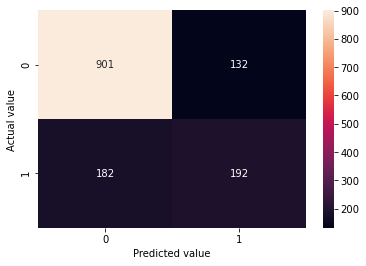

In [94]:
#confusion matrix

cm = tf.math.confusion_matrix(labels = y_test, 
                              predictions = y_pred)

sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted value')
plt.ylabel('Actual value')

In [95]:
#accuracy score

accuracy_score(y_test, y_pred)

0.7768301350390903

In [105]:
"""q1 = widgets.RadioButtons(
        options=['Yes', 'No'],
        value='Yes', # Defaults to 'Yes'
        layout={'width': 'max-content'}, # If the items' names are long
        description='Gender : ',
        disabled=False
    )

q2 = widgets.RadioButtons(
    options=['Yes', 'No'],
    value='Yes', # Defaults to 'Yes'
    layout={'width': 'max-content'}, # If the items' names are long
    description='Senior Citizen : ',
    disabled=False
    )

q3 = widgets.RadioButtons(
        options=['Yes', 'No'],
        value='Yes', # Defaults to 'Yes'
        layout={'width': 'max-content'}, # If the items' names are long
        description='Partner : ',
        disabled=False
    )

q4 = widgets.RadioButtons(
        options=['Yes', 'No'],
        value='Yes', # Defaults to 'Yes'
        layout={'width': 'max-content'}, # If the items' names are long
        description='Dependents : ',
        disabled=False
    )

q5 = input("Tenure : ")

q6 = widgets.RadioButtons(
        options=['Yes', 'No'],
        value='Yes', # Defaults to 'Yes'
        layout={'width': 'max-content'}, # If the items' names are long
        description='Dependents : ',
        disabled=False
    )

q7 = widgets.RadioButtons(
        options=['Yes', 'No'],
        value='Yes', # Defaults to 'Yes'
        layout={'width': 'max-content'}, # If the items' names are long
        description='Dependents : ',
        disabled=False
    )

q8 = widgets.RadioButtons(
        options=['Yes', 'No'],
        value='Yes', # Defaults to 'Yes'
        layout={'width': 'max-content'}, # If the items' names are long
        description='Dependents : ',
        disabled=False
    )

q9 = widgets.RadioButtons(
        options=['Yes', 'No'],
        value='Yes', # Defaults to 'Yes'
        layout={'width': 'max-content'}, # If the items' names are long
        description='Dependents : ',
        disabled=False
    )

q10 = widgets.RadioButtons(
        options=['Yes', 'No'],
        value='Yes', # Defaults to 'Yes'
        layout={'width': 'max-content'}, # If the items' names are long
        description='Dependents : ',
        disabled=False
    )

q11 = widgets.RadioButtons(
        options=['Yes', 'No'],
        value='Yes', # Defaults to 'Yes'
        layout={'width': 'max-content'}, # If the items' names are long
        description='Dependents : ',
        disabled=False
    )

q12 = widgets.RadioButtons(
        options=['Yes', 'No'],
        value='Yes', # Defaults to 'Yes'
        layout={'width': 'max-content'}, # If the items' names are long
        description='Dependents : ',
        disabled=False
    )

q13 = widgets.RadioButtons(
        options=['Yes', 'No'],
        value='Yes', # Defaults to 'Yes'
        layout={'width': 'max-content'}, # If the items' names are long
        description='Dependents : ',
        disabled=False
    )

q14 = widgets.RadioButtons(
        options=['Yes', 'No'],
        value='Yes', # Defaults to 'Yes'
        layout={'width': 'max-content'}, # If the items' names are long
        description='Dependents : ',
        disabled=False
    )

q15 = widgets.RadioButtons(
        options=['Yes', 'No'],
        value='Yes', # Defaults to 'Yes'
        layout={'width': 'max-content'}, # If the items' names are long
        description='Dependents : ',
        disabled=False
    )

q16 = widgets.RadioButtons(
        options=['Yes', 'No'],
        value='Yes', # Defaults to 'Yes'
        layout={'width': 'max-content'}, # If the items' names are long
        description='Dependents : ',
        disabled=False
    )
"""

Tenure : ggg
